# Testing the environment
---
## Setup

In [11]:
from rl4caribou import CaribouScipy
import numpy as np

In [3]:
env = CaribouScipy()

## Testing Wolf-Moose equilibrium

In [7]:
# set environment randomness to zero
env.parameters['sigma_M'], env.parameters['sigma_B'], env.parameters['sigma_W'] = 0, 0, 0 

In [27]:
T = 800
obs, info = env.reset()
M, B, W = env.bound * (obs + 1) /2 
Ms, Bs, Ws = [M], [B], [W]
for t in range(T):
    obs, reward, terminated, truncated, info = env.step(np.array([-1, -1]))
    M, B, W = env.bound * (obs + 1) /2 
    Ms.append(M)
    Bs.append(B)
    Ws.append(W)
    


In [28]:
import pandas as pd

simulation = pd.DataFrame(
    {
        't': [t for t in range(T+1)],
        'M': Ms,
        'B': Bs,
        'W': Ws,
    }
)

<Axes: xlabel='t'>

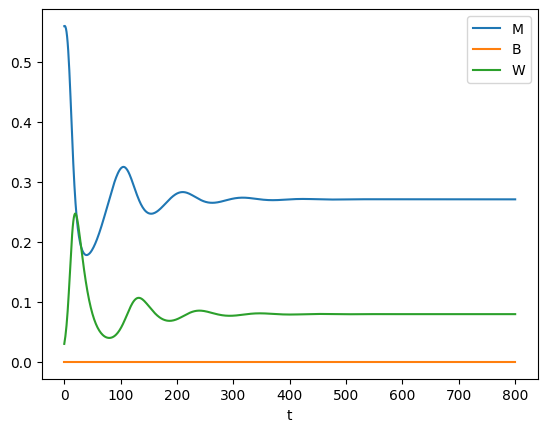

In [29]:
simulation.plot(x='t')

In [30]:
Ms[-1], Bs[-1], Ws[-1]

(0.2711187, 0.0, 0.07967687)

## Ok we start from Moose-Wolf fixed point now

In [33]:
env.initial_pop = np.array([0.2711187, 0.0001, 0.07967687])

## We start managing

In [40]:
from rl4caribou.agents import constAction

In [41]:
pacifist = constAction(mortality_vec=np.array([0,0]))

In [43]:
def simulate(env, agent):
    T = 800
    obs, info = env.reset()
    M, B, W = env.bound * (obs + 1) /2 
    Ms, Bs, Ws = [M], [B], [W]
    for t in range(T):
        action, info = agent.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        M, B, W = env.bound * (obs + 1) /2 
        Ms.append(M)
        Bs.append(B)
        Ws.append(W)
    return pd.DataFrame(
        {
            't': [t for t in range(T+1)],
            'M': Ms,
            'B': Bs,
            'W': Ws,
        }
    )

In [46]:
df = simulate(
    CaribouScipy(
        config={'initial_pop': np.array([0.2711187, 0.0001, 0.07967687])}
    ), 
    pacifist
)

<Axes: xlabel='t'>

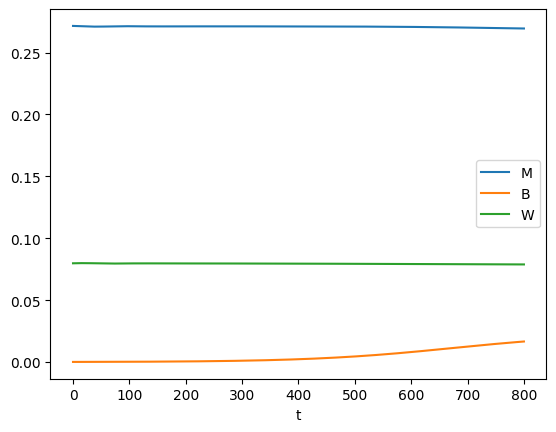

In [47]:
df.plot(x='t')